# Bike Sharing Data Exploration

## Table of Contents

1. <a href="#intro">Introduction</a>
2. <a href="#wrangling">Data Wrangling</a>    
3. <a href="#dav">Data Exploration using Visualization</a>
</ul>

<a id='intro'></a>
## Introduction

[Bay Wheels](https://www.lyft.com/bikes/bay-wheels) is a regional public bicycle sharing system in California's San Francisco Bay Area. [Bay Wheels's trip data set](https://s3.amazonaws.com/baywheels-data/index.html) includes information about individual rides made in the bike-sharing system.

The goal of the project is to conduct an exploratory data analysis on the dataset. I will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. 

***Questions to investigate are:***
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How different is the frequency of trips made before and during COVID-19 pandemy?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import zipfile, os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I downloaded all files about individual rides made since January 2019 until August 2020 from [Ford GoBike System Data](https://s3.amazonaws.com/baywheels-data/index.html). These files are in 20 zip archieves. In order to unzip all the files simultaneously and programatically, I will use **zipfile**, **os** libraries and some help from [StackOverFlow](https://stackoverflow.com/questions/31346790/unzip-all-zipped-files-in-a-folder-to-that-same-folder-using-python-2-7-5).

In [2]:
for file in os.listdir():   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall()  # extract it in the working directory

To read all files in one dataframe, let's use **glob** Python package and instructions given in an article ['How to combine multiple CSV files with 8 lines of code'](https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/).


**Note**: next code cell will take approximately 3-5 min to run.

In [3]:
# use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# combine all files in the list
combined_df = pd.concat([pd.read_csv(f, low_memory=False) for f in all_filenames ])

# export to csv
combined_df.to_csv("combined_df.csv", index=False, encoding='utf-8')

In [4]:
# overview of data
combined_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,80825.0,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65900.0,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62633.0,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44680.0,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60709.0,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
combined_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
152441,NaN,NaN,NaN,419.0,Fern St at Polk St,NaN,NaN,419.0,Fern St at Polk St,NaN,...,B183E65998E5CE2C,docked_bike,2020-08-09 14:06:02,2020-08-09 14:08:30,37.788189,-122.420524,37.788189,-122.420525,casual,NaN
152442,NaN,NaN,NaN,71.0,Broderick St at Oak St,NaN,NaN,321.0,Folsom St at 5th St,NaN,...,3CD837B155139792,docked_bike,2020-08-26 16:44:56,2020-08-26 17:13:40,37.773062,-122.439077,37.780645,-122.402866,casual,NaN
152443,NaN,NaN,NaN,6.0,The Embarcadero at Sansome St,NaN,NaN,55.0,Webster St at Grove St,NaN,...,0A311A0C11734D12,docked_bike,2020-08-31 16:13:51,2020-08-31 16:39:26,37.804770,-122.403234,37.777053,-122.429558,casual,NaN
152444,NaN,NaN,NaN,193.0,Grand Ave at Santa Clara Ave,NaN,NaN,181.0,Grand Ave at Webster St,NaN,...,7BCDDF222BC26B8F,docked_bike,2020-08-01 15:04:57,2020-08-01 15:14:48,37.812744,-122.247215,37.811377,-122.265192,casual,NaN
152445,NaN,NaN,NaN,75.0,Market St at Franklin St,NaN,NaN,20.0,Mechanics Monument Plaza (Market St at Bush St),NaN,...,5C55192D0B6734BA,docked_bike,2020-08-07 19:44:44,2020-08-07 20:06:49,37.773793,-122.421239,37.791300,-122.399051,casual,NaN


In [6]:
combined_df.shape

(4100081, 25)

### Random sampling

First of all, in order to save time running cells, I will **randomly** sample the dataframe. Let's leave 500'000 observations out of 4.1 millions. 

In [7]:
sample_df = combined_df.sample(500000, random_state=1) #random_state to make results reproducible

### Data Assessing

According to the data set documentation [here](https://www.lyft.com/bikes/bay-wheels/system-data) each trip includes information about:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type

But combined dataframe has 25 columns instead of 13. Some data sets had different column names and, while combining all *csv* files into one, it created additional columns and a lot of null values, as you can see below:

In [8]:
combined_df.isnull().sum()

duration_sec                688091
start_time                  688091
end_time                    688091
start_station_id            808363
start_station_name          806529
start_station_latitude      688091
start_station_longitude     688091
end_station_id              821231
end_station_name            819405
end_station_latitude        688091
end_station_longitude       688091
bike_id                     688091
user_type                   688091
bike_share_for_all_trip    1836357
rental_access_method       3361385
ride_id                    3411990
rideable_type              3411990
started_at                 3411990
ended_at                   3411990
start_lat                  3411990
start_lng                  3411990
end_lat                    3413028
end_lng                    3413028
member_casual              3411990
is_equity                  3961830
dtype: int64

Let's investigate missing values a bit more to make sure that non-missing values in one columns coincide with null values in others, so we can replace them:

In [9]:
# calculate percentage of null values
sample_df.isnull().sum() / sample_df.shape[0] * 100

duration_sec               16.7894
start_time                 16.7894
end_time                   16.7894
start_station_id           19.6524
start_station_name         19.6078
start_station_latitude     16.7894
start_station_longitude    16.7894
end_station_id             19.9704
end_station_name           19.9270
end_station_latitude       16.7894
end_station_longitude      16.7894
bike_id                    16.7894
user_type                  16.7894
bike_share_for_all_trip    44.7176
rental_access_method       82.0672
ride_id                    83.2106
rideable_type              83.2106
started_at                 83.2106
ended_at                   83.2106
start_lat                  83.2106
start_lng                  83.2106
end_lat                    83.2338
end_lng                    83.2338
member_casual              83.2106
is_equity                  96.6690
dtype: float64

In [10]:
# sort by bike_id for better following visualization
sample_df = sample_df.sort_values(by='bike_id').reset_index(drop=True)

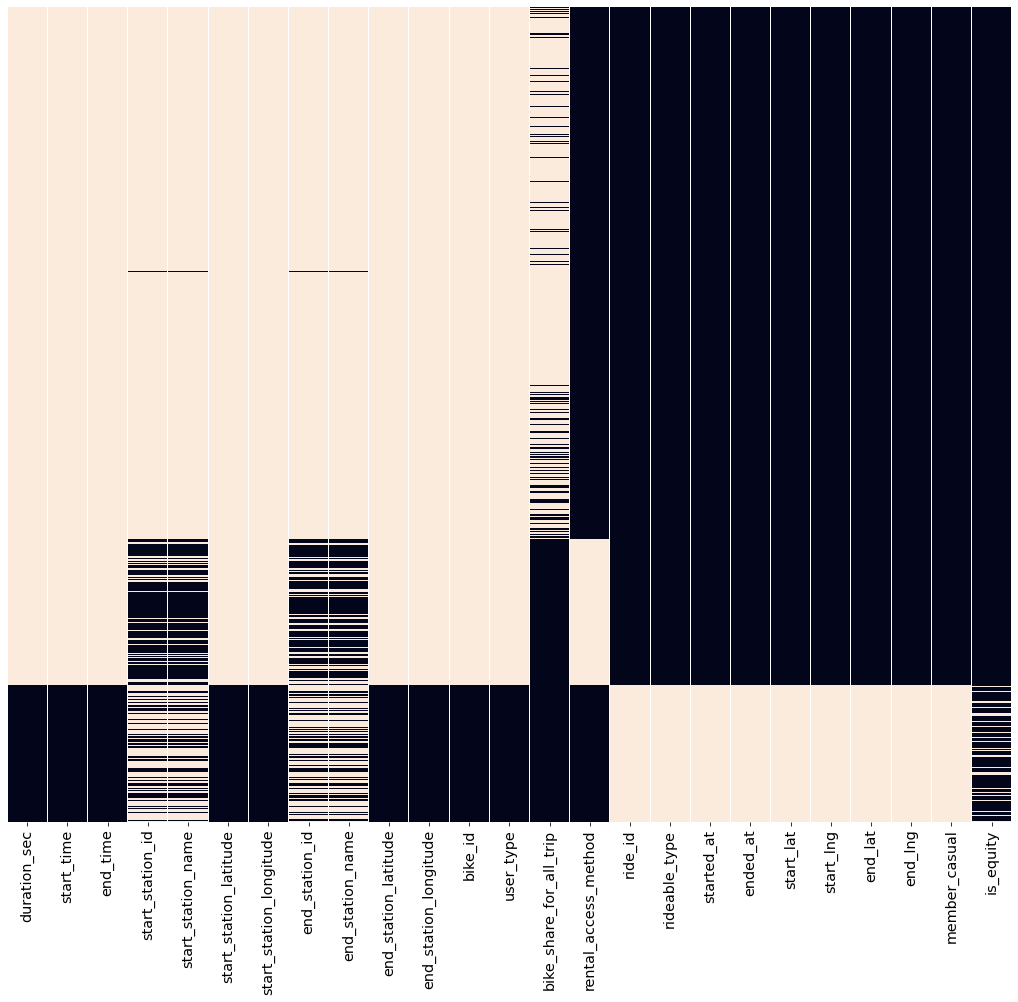

In [11]:
# function to create a heatmap with dark squares for non-null values and light - for nulls
def plot_null_missing (df, figsize=(18,15)):
    plt.figure(figsize=figsize)
    
    # create a boolean df based on whether values are null 
    df_null = df.isnull()
    
    # create a heatmap
    sns.heatmap(~df_null, cbar=False, yticklabels = False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
plot_null_missing(sample_df)

After some investigation, we see that we can impute non-null values from one columns into others:
- member_casual to user_type
- started_at to start_time
- ended_at to end_time

### Data Cleaning

#### Dropping unnecessary columns
In the beginning of the data cleaning process, I will drop columns with more than 80% missing values (that cannot be imputed) and the ones I won't use in the analysis (like longitude and latitude coordinates):
- rental_access_method
- ride_id
- rideable_type
- is_equity
- start_station_id         
- start_station_latitude   
- start_station_longitude   
- end_station_id 
- end_station_latitude     
- end_station_longitude  
- start_lat     
- start_lng             
- end_lat          
- end_lng    

In [12]:
columns_to_drop = ['rental_access_method', 'ride_id', 'rideable_type', 'is_equity', 'start_station_id', 
                   'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
                   'end_station_longitude', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
sample_df.drop(columns_to_drop, axis=1, inplace=True)

#### Combining `member_casual` with `user_type`

In [13]:
# user type column overview
sample_df['user_type'].value_counts()

Subscriber    312596
Customer      103457
Name: user_type, dtype: int64

In [14]:
# member casual column overview 
sample_df['member_casual'].value_counts()

casual    49807
member    34140
Name: member_casual, dtype: int64

As values differ between columns, I will standardize them:
- casual type will become Customer
- member type - Subscriber

In [15]:
sample_df.loc[sample_df['member_casual'] == 'casual', 'user_type'] = 'Customer'
sample_df.loc[sample_df['member_casual'] == 'member', 'user_type'] = 'Subscriber'

# drop 'member_casual' column
sample_df.drop('member_casual', axis=1, inplace=True)

In [16]:
# test
sample_df['user_type'].isnull().sum()

0

#### Cleaning `datetime` columns

In [17]:
# assess data
sample_df[['started_at','ended_at']].tail()

,started_at,ended_at
499995,2020-06-04 14:03:35,2020-06-04 14:28:29
499996,2020-07-10 11:23:12,2020-07-10 11:23:33
499997,2020-08-03 18:33:30,2020-08-03 18:38:01
499998,2020-07-04 12:37:29,2020-07-04 12:56:27
499999,2020-06-18 10:09:03,2020-06-18 10:27:38


In [18]:
sample_df[['start_time', 'end_time']].head()

,start_time,end_time
0,2019-04-11 17:43:13.7320,2019-04-11 17:52:29.8520
1,2019-02-12 08:14:41.1070,2019-02-12 08:22:32.7600
2,2019-02-02 20:12:59.5040,2019-02-02 20:23:36.3000
3,2019-01-23 07:44:36.3030,2019-01-23 07:55:26.9210
4,2019-03-15 16:00:21.2260,2019-03-15 16:12:19.1740


In [19]:
# replace null values removing milliseconds
sample_df.loc[sample_df['started_at'].isnull(), 'started_at'] = sample_df['start_time'].str[:19]
sample_df.loc[sample_df['ended_at'].isnull(), 'ended_at'] = sample_df['end_time'].str[:19]

# drop unnecessary columns
sample_df.drop(['start_time', 'end_time'], axis=1, inplace=True)

In [20]:
# convert object datatype to datetime
time_cols = ['started_at', 'ended_at']
sample_df[time_cols] = sample_df[time_cols].apply(pd.to_datetime)

In [21]:
# test
sample_df[time_cols].head()

,started_at,ended_at
0,2019-04-11 17:43:13,2019-04-11 17:52:29
1,2019-02-12 08:14:41,2019-02-12 08:22:32
2,2019-02-02 20:12:59,2019-02-02 20:23:36
3,2019-01-23 07:44:36,2019-01-23 07:55:26
4,2019-03-15 16:00:21,2019-03-15 16:12:19


In [22]:
sample_df[time_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   started_at  500000 non-null  datetime64[ns]
 1   ended_at    500000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 7.6 MB


#### Turning `duration_sec` into `duration_min`
Let's recalculate a column duration in seconds and then convert seconds into minutes.

In [23]:
sample_df['duration_sec'] = (sample_df['ended_at'] - sample_df['started_at']).dt.total_seconds()
sample_df['duration_min'] = round(sample_df['duration_sec'] / 60, 2)

In [24]:
# test
sample_df[['duration_min', 'duration_sec']].head()

,duration_min,duration_sec
0,9.27,556.0
1,7.85,471.0
2,10.62,637.0
3,10.83,650.0
4,11.97,718.0


In [25]:
# drop column in seconds
sample_df.drop(['duration_sec'], axis=1, inplace=True)

#### Fixing negative `duration_min` and removing outliers

Below we see rows with negative duration. There might be different reasons for it, including intentional brake of timer. That is why it's safer to drop these rows. 

In [26]:
sample_df[sample_df['duration_min'] < 0]

,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,started_at,ended_at,duration_min
32389,Valencia St at 16th St,Folsom St at 5th St,798.0,Customer,No,2019-11-03 01:49:43,2019-11-03 01:05:50,-43.88
98952,8th St at Ringold St,Cyril Magnin St at Ellis St,2359.0,Customer,No,2019-11-03 01:56:25,2019-11-03 01:04:54,-51.52
418190,3rd St at Townsend St,Powell St BART Station (Market St at 4th St),NaN,Subscriber,NaN,2020-05-16 19:42:15,2020-05-16 19:42:01,-0.23
418271,1st St at Folsom St,Salesforce Transit Center (Natoma St at 2nd St),NaN,Subscriber,NaN,2020-04-26 19:25:04,2020-04-26 19:24:52,-0.20
425359,Brannan St at Colin P Kelly Jr St,Beale St at Harrison St,NaN,Subscriber,NaN,2020-05-12 11:28:20,2020-05-12 11:28:07,-0.22
428438,Washington St at Kearny St,Montgomery St BART Station (Market St at 2nd St),NaN,Subscriber,NaN,2020-06-10 12:38:52,2020-06-10 12:38:45,-0.12
432676,38th Ave at Balboa St,48th Ave at Cabrillo St,NaN,Subscriber,NaN,2020-08-26 09:22:37,2020-08-26 09:22:02,-0.58
433444,Folsom St at 7th St,Civic Center/UN Plaza BART Station (Market St ...,NaN,Subscriber,NaN,2020-04-23 16:50:08,2020-04-23 16:49:58,-0.17
434374,Broadway at 40th St,59th St at Horton St,NaN,Subscriber,NaN,2020-07-21 08:15:01,2020-07-21 08:14:55,-0.10
436468,El Embarcadero at Grand Ave,14th St at Mandela Pkwy,NaN,Customer,NaN,2020-06-19 21:48:20,2020-06-19 21:34:17,-14.05


In [27]:
# drop rows with negative values
sample_df = sample_df[sample_df['duration_min'] >= 0]

As well, there are some extreme outliers. I will remove around 0.5% of data, which is from 2 hours to 1 month of bike usage.

In [28]:
# leave rows with less than 2 hours duration
sample_df = sample_df[sample_df['duration_min'] < 120]
sample_df.shape

(497260, 8)

#### Creating new time columns

As I will be analysing days, months, days of the week and times of the day, let's create columns for each necessary variable, based on time when a user took a bike.

In [29]:
sample_df['hour'] = sample_df['started_at'].dt.hour
sample_df['day'] = sample_df['started_at'].dt.day
sample_df['day_of_week'] = sample_df['started_at'].dt.weekday
sample_df['month'] = sample_df['started_at'].dt.month
sample_df['year'] = sample_df['started_at'].dt.year

In [30]:
sample_df.head()

,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,started_at,ended_at,duration_min,hour,day,day_of_week,month,year
0,China Basin St at 3rd St,7th St at Brannan St,11.0,Subscriber,No,2019-04-11 17:43:13,2019-04-11 17:52:29,9.27,17,11,3,4,2019
1,17th St at Dolores St,Market St at 10th St,11.0,Subscriber,No,2019-02-12 08:14:41,2019-02-12 08:22:32,7.85,8,12,1,2,2019
2,14th St at Mission St,San Francisco Public Library (Grove St at Hyde...,11.0,Subscriber,No,2019-02-02 20:12:59,2019-02-02 20:23:36,10.62,20,2,5,2,2019
3,Union Square (Powell St at Post St),4th St at Mission Bay Blvd S,11.0,Customer,No,2019-01-23 07:44:36,2019-01-23 07:55:26,10.83,7,23,2,1,2019
4,Market St at 10th St,Raymond Kimbell Playground,11.0,Subscriber,No,2019-03-15 16:00:21,2019-03-15 16:12:19,11.97,16,15,4,3,2019


#### Fixing Data Types

In [31]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497260 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_station_name       399523 non-null  object        
 1   end_station_name         398079 non-null  object        
 2   bike_id                  414307 non-null  float64       
 3   user_type                497260 non-null  object        
 4   bike_share_for_all_trip  275080 non-null  object        
 5   started_at               497260 non-null  datetime64[ns]
 6   ended_at                 497260 non-null  datetime64[ns]
 7   duration_min             497260 non-null  float64       
 8   hour                     497260 non-null  int64         
 9   day                      497260 non-null  int64         
 10  day_of_week              497260 non-null  int64         
 11  month                    497260 non-null  int64         
 12  year            

In [32]:
# categorical data to categorical data type
sample_df[['user_type', 'bike_share_for_all_trip']] = sample_df[['user_type', 'bike_share_for_all_trip']].astype(
    'category')

In [33]:
# test
sample_df[['user_type', 'bike_share_for_all_trip']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497260 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   user_type                497260 non-null  category
 1   bike_share_for_all_trip  275080 non-null  category
dtypes: category(2)
memory usage: 4.7 MB


The last thing I will do before starting visualization is to sort rows in chronological order (reseting index) and create a copy of the dataframe:

In [34]:
sample_df = sample_df.sort_values(by='started_at').reset_index(drop=True)
clean_df = sample_df.copy()
clean_df.shape

(497260, 13)

In [35]:
# save cleaned dataset to csv
clean_df.to_csv('baywheel.csv', index=False)

<a id='dav'></a>
## Data Exploration using Visualization

### Univariate Exploration

We have 13 columns and around 994.6k rows, let's start univariate exploration with categorical variables. As there are 2 categories in each column, I will use pie charts to visualize them:

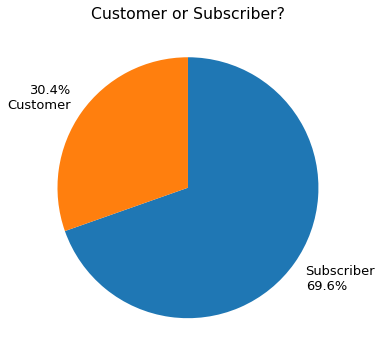

In [36]:
# pie chart for user types
plt.figure(figsize=[6,6])
sorted_user_type = clean_df['user_type'].value_counts()
plt.rcParams['font.size'] = 13
plt.pie(sorted_user_type, labels=sorted_user_type.index, startangle=90, counterclock=False, autopct='%1.1f%%', 
        pctdistance=1.3);
plt.title('Customer or Subscriber?');

**Note**: A column called `bike_share_for_all` tracks members who are enrolled in the [Bike Share for All](https://www.lyft.com/bikes/bay-wheels/bike-share-for-all) program for low-income residents.

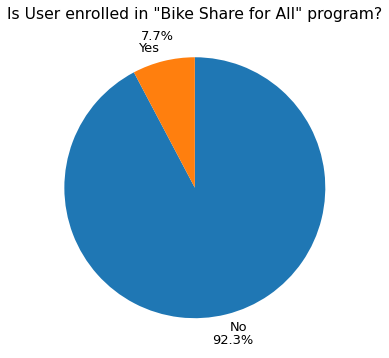

In [37]:
# pie chart for program enrollements
plt.figure(figsize=[6,6])
sorted_bike_share = clean_df['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_bike_share, labels=sorted_bike_share.index, startangle=90, counterclock=False, autopct='%1.1f%%',
       pctdistance=1.2);
plt.title('Is User enrolled in "Bike Share for All" program?');

Almost 70% of users are subcribers of the bike sharing system but more than 92% - are not enrolled in "Bike Share fo All" program. Nevertheless, we cannot be completely sure about the program enrollements, as we have roughly 45% of the values missing.

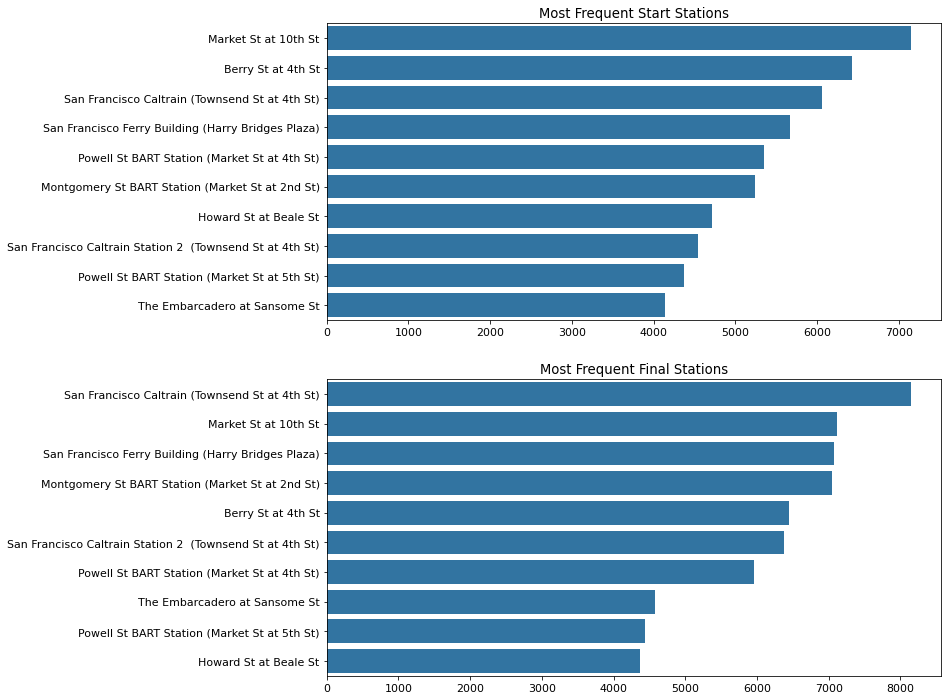

In [38]:
# let's compare and analyse most popular stations
fig = plt.figure(figsize=(11,12))

# choose top 10 of stations to start the trip and top 10 to end it
top_start_stations = clean_df['start_station_name'].value_counts()[:10].sort_values(ascending=False)
top_end_stations = clean_df['end_station_name'].value_counts()[:10].sort_values(ascending=False)

base_color = sns.color_palette()[0]
plt.rcParams['font.size'] = 11

ax1 = fig.add_subplot(2,1,1)
sns.countplot(data=clean_df, y='start_station_name', color=base_color, order=top_start_stations.index);
plt.title('Most Frequent Start Stations');
plt.ylabel('');
plt.xlabel('');

ax2 = fig.add_subplot(2,1,2)
sns.countplot(data=clean_df, y='end_station_name', color=base_color, order=top_end_stations.index);
plt.title('Most Frequent Final Stations');
plt.ylabel('');
plt.xlabel('');

Unsurprisingly, most of the top stations for beginning the trip are the top stations for ending it. And almost all of them are located in [Central Embarcadero](https://en.wikipedia.org/wiki/Central_Embarcadero_Piers_Historic_District) district of San Francisco, which is the main area of shops, businesses and sightseeing attractions. Another interesting fact that these top bike stations tend to be located near train or bus stations.

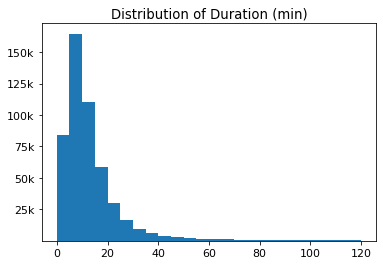

In [43]:
# plot duration of trips on standard scale
bins = np.arange(0, clean_df['duration_min'].max()+5, 5)
plt.hist(data=clean_df, x='duration_min', bins=bins);
plt.yticks([25000,50000,75000,100000,125000,150000],['25k','50k','75k','100k','125k','150k']);
plt.title('Distribution of Duration (min)');

There's a long tail in the distribution, so let's put it on a log scale instead:

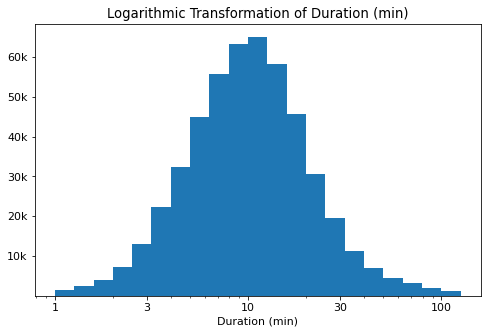

In [44]:
# plot on logarithmic scale
bins = 10 ** np.arange(clean_df['duration_min'].min(), np.log10(clean_df['duration_min'].max())+0.1, 0.1)
plt.figure(figsize=[8,5])
plt.hist(data = clean_df, x = 'duration_min', bins = bins)
plt.xscale('log')
tick_locs = [1,3,10,30,100]
plt.xticks(tick_locs, tick_locs)
plt.yticks([10000,20000,30000,40000,50000,60000],['10k','20k','30k','40k','50k','60k']);
plt.xlabel('Duration (min)')
plt.title('Logarithmic Transformation of Duration (min)')
plt.show()

Duration has a long-tailed distribution, with a lot of values on the short duration end. The most values are in the bin from 5 to 10 minutes per trip and more than 90% of data falls into less than 20 minutes per trip. 

When plotted on a log-scale, the duration distribution looks normal unimodal with one peak between 8 and 13 minutes.

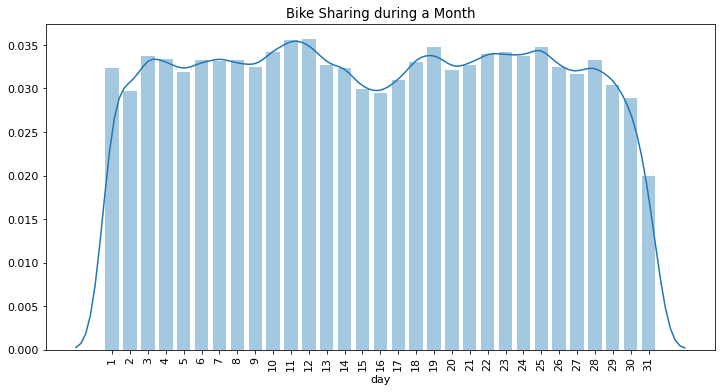

In [45]:
# distplot for days of a month
plt.figure(figsize=[12,6])
bins = np.arange(0.5, 31.5+1, 1)
sns.distplot(clean_df['day'], bins=bins, hist_kws={"rwidth":0.75});
plt.xticks(np.arange(1, 31+1, 1), rotation=90);
plt.title('Bike Sharing during a Month');

The highest peaks are on 11-12 and 25 days of a month and the lowest - on 31, 30 (because not all months have 31 or even 30 days) and interestingly on 2 and 15-16 days of a month. It creates slightly bimodal distribution.

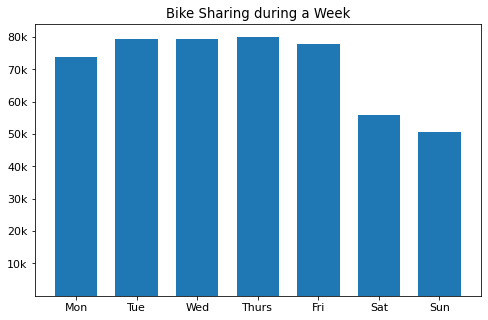

In [48]:
# bar plot for days of a week
bins = np.arange(-0.5, 6.5+1, 1)
plt.figure(figsize=[8,5])
plt.hist(clean_df['day_of_week'], bins=bins, rwidth=0.7);
plt.xticks(np.arange(0, 6+1, 1));
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']);
plt.yticks([10000,20000,30000,40000,50000,60000,70000,80000],['10k','20k','30k','40k','50k','60k','70k','80k']);
plt.title('Bike Sharing during a Week');

We can clearly see that weekdays are more popular than weekends, meaning that people tend to use bike sharing system to get to work or to get home from work more than for leasure time during weekends.

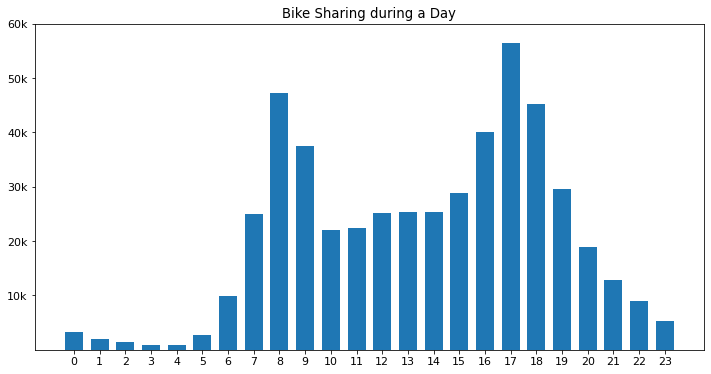

In [50]:
# bar chart for times of a day
plt.figure(figsize=[12,6])
bins = np.arange(-0.5, 23.5+1, 1)
plt.hist(clean_df['hour'], bins=bins, rwidth=0.7);
plt.xticks(np.arange(0, 23+1, 1));
plt.yticks([10000,20000,30000,40000,50000,60000],['10k','20k','30k','40k','50k','60k']);
plt.title('Bike Sharing during a Day');

Here we see bimodal distribution with high peaks at 8 am and 5 pm, the times when people go to / from work.

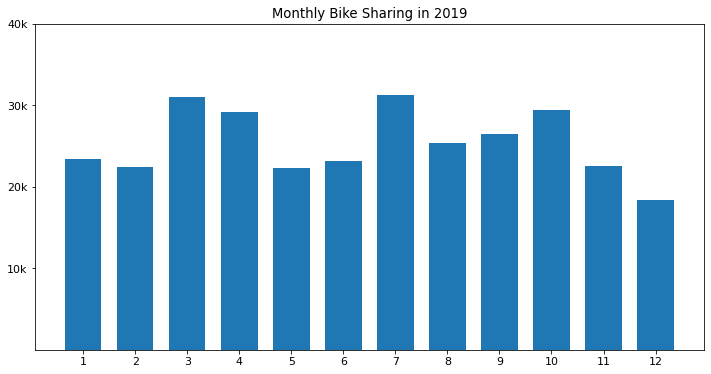

In [51]:
# chart for monthly count in 2019
plt.figure(figsize=[12,6])
bins = np.arange(0.5, 12.5+1, 1)
bool_19 = clean_df['year'] == 2019
plt.hist(clean_df[bool_19]['month'], bins=bins, rwidth=0.7);
plt.xticks(np.arange(1, 12+1, 1));
plt.yticks([10000,20000,30000,40000],['10k','20k','30k','40k']);
plt.title('Monthly Bike Sharing in 2019');

In 2019, the most popular months for bike sharing were March, April, July and October, while the least preferable were colder and more rainy months (January, February, November and December) and surprisingly warmer and more comfortable May and June. 

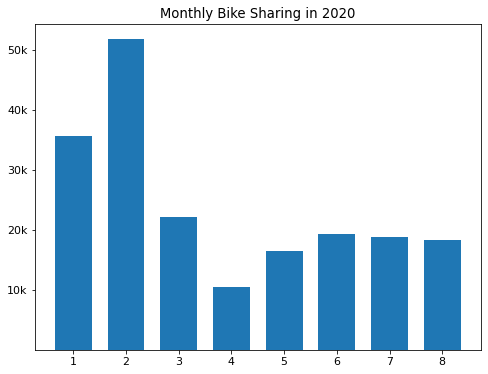

In [53]:
# chart for monthly count in 2020
plt.figure(figsize=[8,6])
bins = np.arange(0.5, 8.5+1, 1)
bool_20 = clean_df['year'] == 2020
plt.hist(clean_df[bool_20]['month'], bins=bins, rwidth=0.7);
plt.xticks(np.arange(1, 8+1, 1));
plt.yticks([10000,20000,30000,40000,50000],['10k','20k','30k','40k','50k']);
plt.title('Monthly Bike Sharing in 2020');

In 2020, we see a really high peak in February. Actually, both months January and February had significantly more traffic than any month in 2019. We can see that the bike sharing system Bay Wheels had a great potential for this year. But everything changed since March 2020, which is coincide with a start of the global COVID-19 pandemy. Bay Wheels had it lowest in April and then partly recovered in May.

### Bivariate Exploration

First of all, let's check for correlations among quantitative variable.

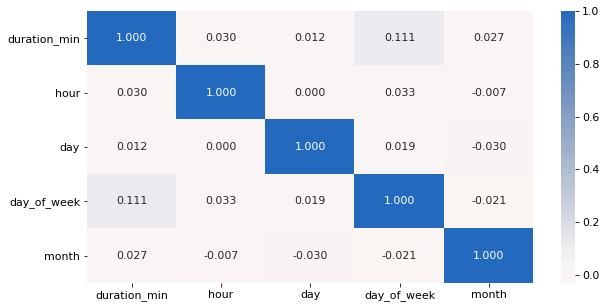

In [54]:
quantitative_vars = ['duration_min', 'hour', 'day', 'day_of_week', 'month']

# correlation plot
plt.figure(figsize = [10,5])
sns.heatmap(clean_df[quantitative_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

As you could assume, there is no correlation among quantitative variables, except for a very weak positive correlation between days of the week and duration, meaning that some people tend to take bikes for slightly longer periods of time in the end of the week. And we can see this observation on a scatter plot below.

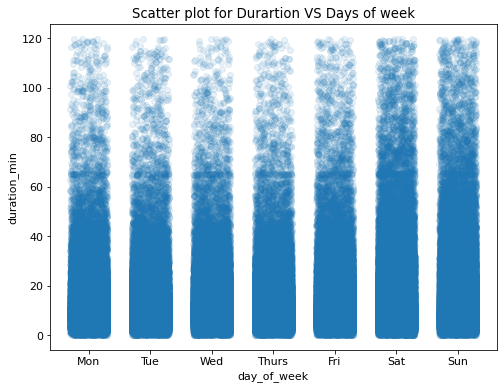

In [55]:
plt.figure(figsize=[8,6])
sns.regplot(data=clean_df, x='day_of_week', y='duration_min', fit_reg=False, 
            x_jitter=0.3, scatter_kws={'alpha':0.1}); # to see overlapped points
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']);
plt.title('Scatter plot for Durartion VS Days of week');

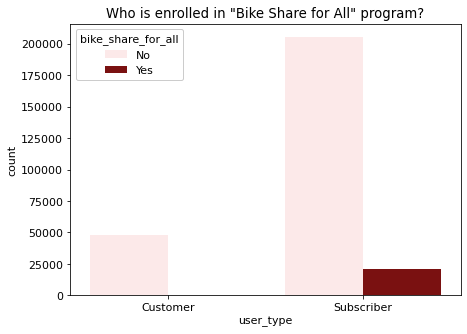

In [56]:
# clastered bar chart
plt.figure(figsize=[7,5])
sns.countplot(data = clean_df, x = 'user_type', hue = 'bike_share_for_all_trip', color='darkred');
plt.legend(loc=2, title='bike_share_for_all', framealpha=1);
plt.title('Who is enrolled in "Bike Share for All" program?');

As we see, only subscribers participate in "Bike Share for All" program. We can assume that this program is only available for members.

Now I will investigate if any quanitative variable depends on if a user is a subscriber or a customer. I will use both violin plots and boxplots for better understanding of data.

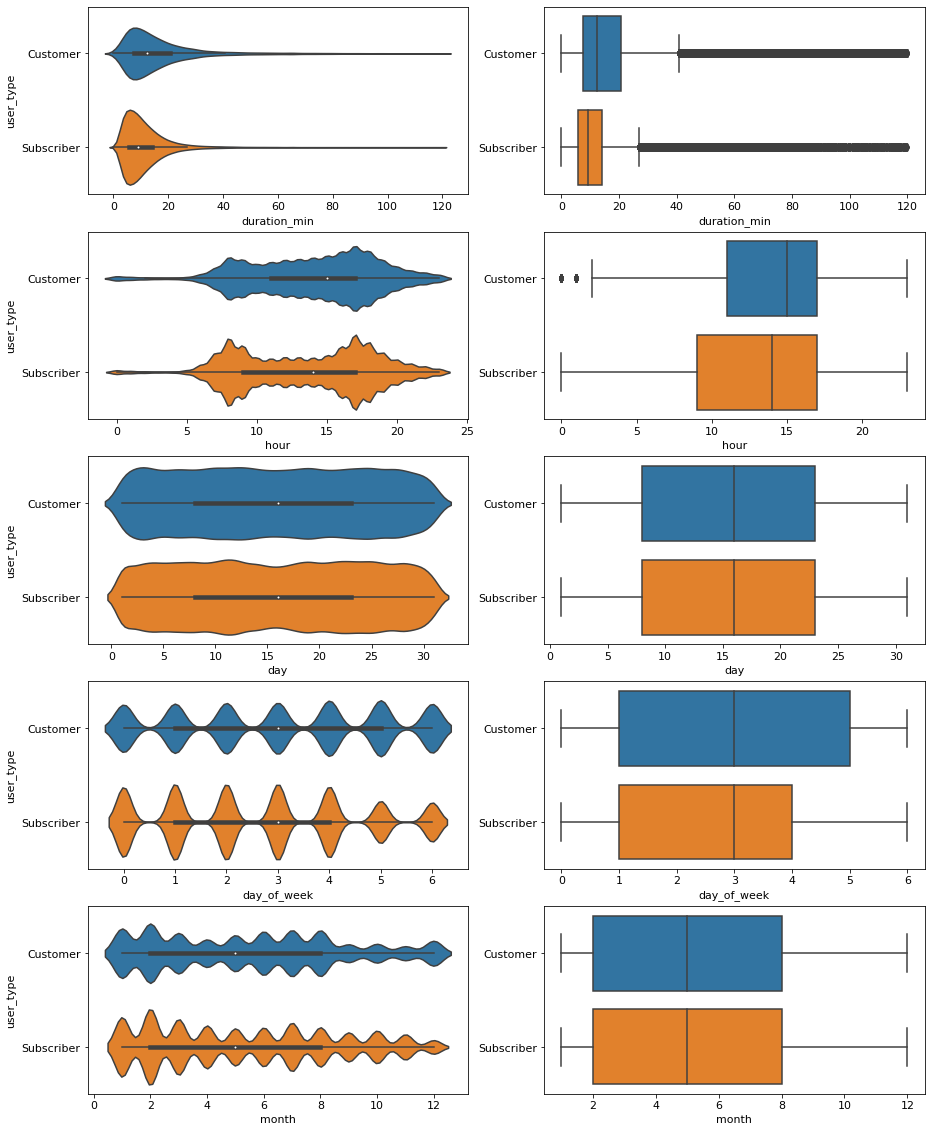

In [57]:
# plot the categorical variable 'user_type' against numerical variables
fig, ax = plt.subplots(ncols = 2, nrows = 5 , figsize = [15,20])

for i in range(len(quantitative_vars)):
    var = quantitative_vars[i]
    sns.violinplot(data = clean_df, y = 'user_type', x = var, ax = ax[i,0])
    sns.boxplot(data = clean_df, y = 'user_type', x = var, ax = ax[i,1]).set(ylabel=None)

plt.show()

According to the boxplots and violin plots above, average duration of using the service is shorter for subscribers, compared to customers. For members it's around 10 minutes, while for customers - 15. One of the possible reasons is that subscribers are using the bike sharing system more regularly for shorter trips (for example, going from subway station to work), while customers choose it for their leasure time for longer periods of time. 

We can reach the same conlusion based on the plots showing days of a week. The medians are the same, but the third quartile is higher for customers because they use Bay Wheels' bikes on weekends more often then members (which is clearly seen on violin plot).

And we see the same in their preferences of time of a day. Subscribers are more active in the mornings and evenings right before and after work, while the distribution for customers is a bit more blended.

And, finally, there is no visible difference between customers and subsribers in their preferences of days of a month and months of a year.

### Multivariate Exploration

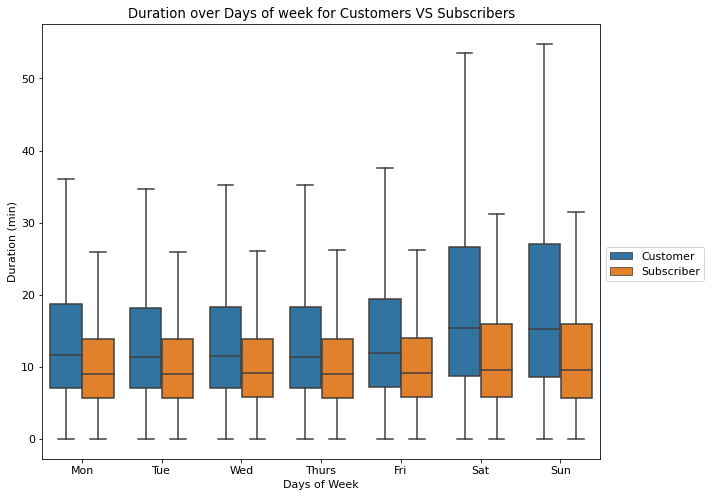

In [58]:
# clustered boxplots to see distribution of trip's lenths for customers and subscribers during week
fig = plt.figure(figsize = [10,8])
sns.boxplot(data=clean_df, x='day_of_week', y='duration_min', hue='user_type', showfliers = False);
plt.ylabel('Duration (min)')
plt.xlabel('Days of Week')
plt.title('Duration over Days of week for Customers VS Subscribers')
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']);
plt.legend(loc='upper left',  bbox_to_anchor=(1, 0.5));

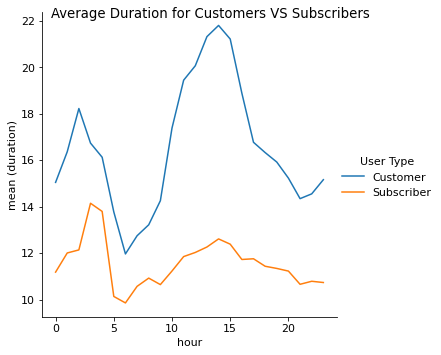

In [59]:
# function for line plot
def mean_poly(x, y, bins = 10, **kwargs):
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

# create line plot to see distribution over time for user types
bin_edges = np.arange(-0.5, clean_df['duration_min'].max()+1, 1)
g = sns.FacetGrid(data = clean_df, hue = 'user_type', height = 5);
g.map(mean_poly, "hour", "duration_min", bins = bin_edges);
g.set_ylabels('mean (duration)');
g.add_legend();
g.fig.suptitle('Average Duration for Customers VS Subscribers');
g._legend.set_title('User Type')

Based on 2 plot above, we confirm the fact that the customers use Bay Wheel services for longer periods of time compared to subscribers, especially during weekends.

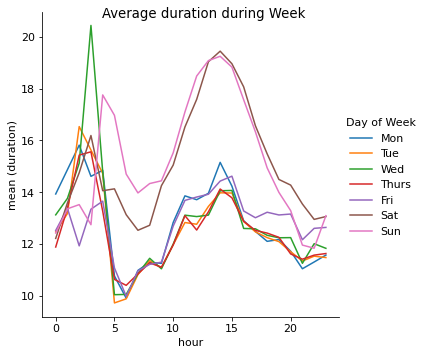

In [60]:
# create line plot to see distribution over time for different days of week
bin_edges = np.arange(-0.5, clean_df['duration_min'].max()+1, 1)
g = sns.FacetGrid(data = clean_df, hue = 'day_of_week', height = 5);
g.map(mean_poly, "hour", "duration_min", bins = bin_edges);
g.set_ylabels('mean (duration)');
g.add_legend();
g.fig.suptitle('Average duration during Week');

# replace title and labels for legend
new_labels = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g._legend.set_title('Day of Week')

Interestingly, after 5 am duration of bike trips during weekends and weekdays begin to differ. On weekends the average trip takes from 12-15 minutes (for early mornings) up to 20 minutes (around 2 pm). And during weekdays it takes from 10 to 14 minutes depending on time of the day. 